# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [MOchammad Azriel Rizky Syahputra]
- **Email:** [saputraarel@gmail.com]
- **ID Dicoding:** [saputraarel_28]

## Menentukan Pertanyaan Bisnis

- Metode pembayaran apa yang paling banyak digunakan pelanggan?
- Produk kategori apa yang paling banyak terjual?

## Import Semua Packages/Library yang Digunakan

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime as dt
import geopandas as gpd
import folium
from folium.plugins import HeatMap

## Data Wrangling

### Gathering Data

In [6]:
customers = pd.read_csv("/content/sample_data/E-Commerce Public Dataset/customers_dataset.csv")
geolocation = pd.read_csv("/content/sample_data/E-Commerce Public Dataset/geolocation_dataset.csv")
order_items = pd.read_csv("/content/sample_data/E-Commerce Public Dataset/order_items_dataset.csv")
order_payments = pd.read_csv("/content/sample_data/E-Commerce Public Dataset/order_payments_dataset.csv")
order_reviews = pd.read_csv("/content/sample_data/E-Commerce Public Dataset/order_reviews_dataset.csv")
orders = pd.read_csv("/content/sample_data/E-Commerce Public Dataset/orders_dataset.csv")
products = pd.read_csv("/content/sample_data/E-Commerce Public Dataset/products_dataset.csv")
sellers = pd.read_csv("/content/sample_data/E-Commerce Public Dataset/sellers_dataset.csv")
category_translation = pd.read_csv("/content/sample_data/E-Commerce Public Dataset/product_category_name_translation.csv")

In [7]:
print(customers.head())
print(orders.head())

                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cd

**Insight:**
- Memuat dataset ke dalam DataFrame
- Menampilkan beberapa baris pertama dari setiap dataset

### Assessing Data

In [8]:
print(customers.info())
print(orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  obje

In [9]:
def check_missing_values(df):
    return df.isnull().sum()

print(check_missing_values(customers))
print(check_missing_values(orders))

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


In [10]:
print(customers.duplicated().sum())
print(orders.duplicated().sum())

0
0


**Insight:**
- Mengecek informasi dataset (jumlah baris, kolom, tipe data)
- Mengecek missing values, data duplikat, dan anomali

### Cleaning Data

In [11]:
customers.dropna(inplace=True)
orders.dropna(inplace=True)

In [12]:
customers.drop_duplicates(inplace=True)
orders.drop_duplicates(inplace=True)

**Insight:**
- Menghapus atau mengisi missing values
- Menghapus data duplikat

## Exploratory Data Analysis (EDA)

### Explore ...

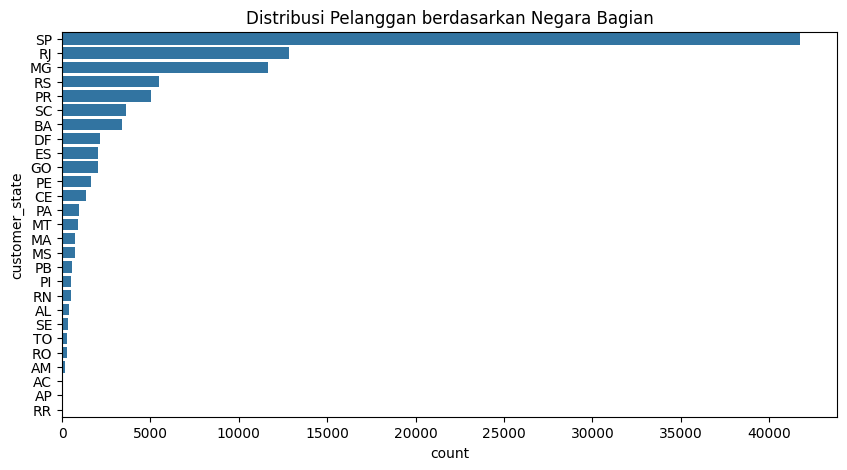

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(y=customers['customer_state'], order=customers['customer_state'].value_counts().index)
plt.title("Distribusi Pelanggan berdasarkan Negara Bagian")
plt.show()

In [14]:
product_sales = order_items.groupby('product_id').size().reset_index(name='count')
product_sales = product_sales.sort_values(by='count', ascending=False)
print(product_sales.head())

                             product_id  count
22112  aca2eb7d00ea1a7b8ebd4e68314663af    527
19742  99a4788cb24856965c36a24e339b6058    488
8613   422879e10f46682990de24d770e7f83d    484
7364   389d119b48cf3043d311335e499d9c6b    392
7079   368c6c730842d78016ad823897a372db    388


**Insight:**
- Analisis distribusi data
- Analisis hubungan antar variabel

## Visualization & Explanatory Analysis

### Pertanyaan 1: Menjawab pertanyaan bisnis melalui visualisasi data

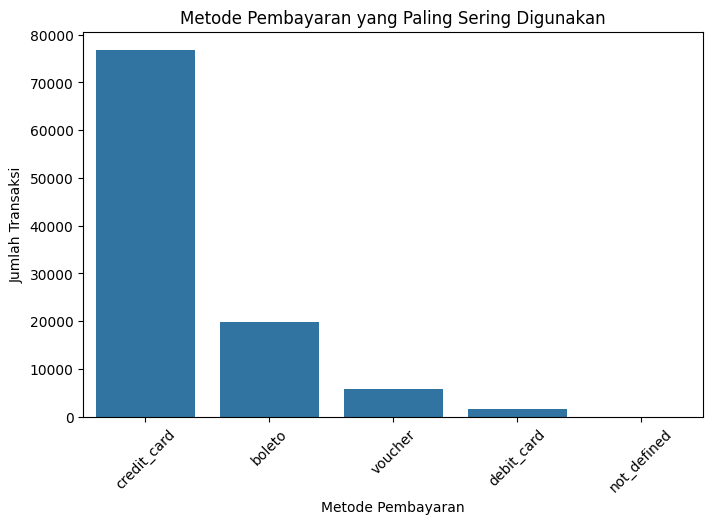

In [15]:
plt.figure(figsize=(8,5))
sns.countplot(x=order_payments['payment_type'], order=order_payments['payment_type'].value_counts().index)
plt.title("Metode Pembayaran yang Paling Sering Digunakan")
plt.xlabel("Metode Pembayaran")
plt.ylabel("Jumlah Transaksi")
plt.xticks(rotation=45)
plt.show()

**Insight:**
- Berdasarkan grafik batang mengenai metode pembayaran yang paling sering digunakan, dapat disimpulkan bahwa kartu kredit (credit_card) merupakan metode pembayaran yang paling dominan, dengan jumlah transaksi yang jauh lebih tinggi dibandingkan metode lainnya. Hal ini menunjukkan bahwa mayoritas pelanggan lebih memilih kemudahan dan fleksibilitas yang ditawarkan oleh kartu kredit dalam berbelanja.
- Kesimpulan bahwa strategi bisnis e-commerce sebaiknya lebih berfokus pada optimalisasi pembayaran menggunakan kartu kredit, misalnya dengan menawarkan program cicilan atau cashback untuk menarik lebih banyak pembeli. Namun, metode boleto juga tetap perlu diperhatikan, terutama untuk pelanggan yang tidak memiliki akses ke kartu kredit.

### Pertanyaan 2: Menginterpretasikan insight dari visualisasi

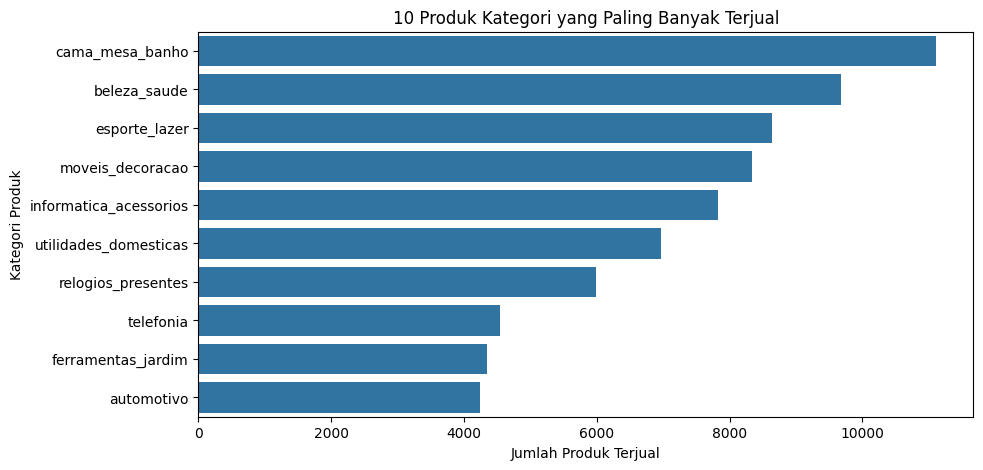

In [16]:
product_sales = order_items.merge(products, on='product_id')
kategori_terjual = product_sales['product_category_name'].value_counts().reset_index()
kategori_terjual.columns = ['product_category_name', 'count']

plt.figure(figsize=(10,5))
sns.barplot(y=kategori_terjual['product_category_name'][:10], x=kategori_terjual['count'][:10])
plt.title("10 Produk Kategori yang Paling Banyak Terjual")
plt.xlabel("Jumlah Produk Terjual")
plt.ylabel("Kategori Produk")
plt.show()

**Insight:**
- Berdasarkan grafik batang yang menunjukkan 10 kategori produk yang paling banyak terjual, dapat disimpulkan bahwa kategori "cama_mesa_banho" (perlengkapan tidur, meja, dan kamar mandi) memiliki jumlah penjualan tertinggi dibandingkan kategori lainnya. Hal ini menunjukkan bahwa produk-produk rumah tangga, khususnya yang berkaitan dengan kenyamanan dan dekorasi rumah, sangat diminati oleh pelanggan.
- Kesimpulan bahwa strategi pemasaran dapat difokuskan pada kategori produk dengan permintaan tinggi seperti perlengkapan rumah tangga, kecantikan, dan olahraga, serta mencari peluang untuk meningkatkan penjualan di kategori dengan permintaan lebih rendah melalui promosi atau kampanye pemasaran yang lebih agresif.

## Analisis Lanjutan (Opsional)

### RFM Analysis untuk Metode Pembayaran

In [17]:
rfm_data = orders.merge(order_payments, on='order_id')
print(rfm_data.head())

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
3    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
4    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10

In [18]:
rfm_data['order_purchase_timestamp'] = pd.to_datetime(rfm_data['order_purchase_timestamp'])

In [19]:
latest_date = rfm_data['order_purchase_timestamp'].max() + dt.timedelta(days=1)
print(latest_date)

2018-08-30 15:00:37


In [20]:
rfm = rfm_data.groupby('customer_id').agg({
    'order_purchase_timestamp': lambda x: (latest_date - x.max()).days,
    'order_id': 'count',
    'payment_value': 'sum'
}).reset_index()
print(rfm)

                            customer_id  order_purchase_timestamp  order_id  \
0      00012a2ce6f8dcda20d059ce98491703                       288         1   
1      000161a058600d5901f007fab4c27140                       410         1   
2      0001fd6190edaaf884bcaf3d49edf079                       548         1   
3      0002414f95344307404f0ace7a26f1d5                       379         1   
4      000379cdec625522490c315e70c7a9fb                       150         1   
...                                 ...                       ...       ...   
96455  fffcb937e9dd47a13f05ecb8290f4d3e                       166         1   
96456  fffecc9f79fd8c764f843e9951b11341                       153         3   
96457  fffeda5b6d849fbd39689bb92087f431                       100         1   
96458  ffff42319e9b2d713724ae527742af25                        77         1   
96459  ffffa3172527f765de70084a7e53aae8                       362         1   

       payment_value  
0             114.74  
1    

In [21]:
rfm.columns = ['customer_id', 'Recency', 'Frequency', 'Monetary']
print(rfm.columns)

Index(['customer_id', 'Recency', 'Frequency', 'Monetary'], dtype='object')


In [22]:
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5], duplicates='drop')
rfm['M_Score'] = pd.qcut(rfm['Monetary'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5], duplicates='drop')
print(rfm)

                            customer_id  Recency  Frequency  Monetary R_Score  \
0      00012a2ce6f8dcda20d059ce98491703      288          1    114.74       2   
1      000161a058600d5901f007fab4c27140      410          1     67.41       1   
2      0001fd6190edaaf884bcaf3d49edf079      548          1    195.42       1   
3      0002414f95344307404f0ace7a26f1d5      379          1    179.35       2   
4      000379cdec625522490c315e70c7a9fb      150          1    107.01       4   
...                                 ...      ...        ...       ...     ...   
96455  fffcb937e9dd47a13f05ecb8290f4d3e      166          1     91.91       4   
96456  fffecc9f79fd8c764f843e9951b11341      153          3     81.36       4   
96457  fffeda5b6d849fbd39689bb92087f431      100          1     63.13       4   
96458  ffff42319e9b2d713724ae527742af25       77          1    214.13       5   
96459  ffffa3172527f765de70084a7e53aae8      362          1     45.50       2   

      F_Score M_Score  
0  

In [23]:
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

In [24]:
order_payments_with_customer = order_payments.merge(orders[['order_id', 'customer_id']], on='order_id', how='left')
print(order_payments_with_customer.head())

                           order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value                       customer_id  
0                     8          99.33  0a8556ac6be836b46b3e89920d59291c  
1                     1          24.39  f2c7fc58a9de810828715166c672f10a  
2                     1          65.71  25b14b69de0b6e184ae6fe2755e478f9  
3                     8         107.78  7a5d8efaaa1081f800628c30d2b0728f  
4                     2         128.45  15fd6fb8f8312dbb4674e4518d6fa3b3  


In [25]:
high_value_customers = rfm[rfm['RFM_Score'] == '555']
print(high_value_customers.head())

                           customer_id  Recency  Frequency  Monetary R_Score  \
642   01aef689891025af290bbdc4788d87da       31          2    371.42       5   
1243  0332d8ec6d259a1caeda045188ffe70f       58          2    285.73       5   
1425  03b243d7ac6a467982044dd9dddb4d68       45          2    583.15       5   
1710  047965eae6564b51ea05b945966ec595       20          2    212.89       5   
2579  06d529bccb0825265d8b5b73c66e53d8       11          2    210.36       5   

     F_Score M_Score RFM_Score  
642        5       5       555  
1243       5       5       555  
1425       5       5       555  
1710       5       5       555  
2579       5       5       555  


In [26]:
high_value_payments = high_value_customers.merge(order_payments_with_customer, on='customer_id', how='left')
print(high_value_payments.head())

                        customer_id  Recency  Frequency  Monetary R_Score  \
0  01aef689891025af290bbdc4788d87da       31          2    371.42       5   
1  01aef689891025af290bbdc4788d87da       31          2    371.42       5   
2  0332d8ec6d259a1caeda045188ffe70f       58          2    285.73       5   
3  0332d8ec6d259a1caeda045188ffe70f       58          2    285.73       5   
4  03b243d7ac6a467982044dd9dddb4d68       45          2    583.15       5   

  F_Score M_Score RFM_Score                          order_id  \
0       5       5       555  df720130627bfe896e4eaafe2df5b721   
1       5       5       555  df720130627bfe896e4eaafe2df5b721   
2       5       5       555  9baa5b4e68d86c9f1694e1598b543a93   
3       5       5       555  9baa5b4e68d86c9f1694e1598b543a93   
4       5       5       555  c264a164325d23f657477ec6c1f0907a   

   payment_sequential payment_type  payment_installments  payment_value  
0                   1  credit_card                     3         321.42 

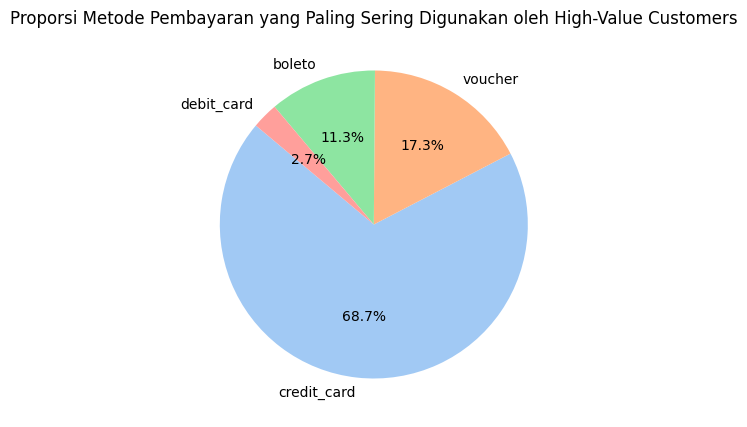

In [87]:
payment_counts = high_value_payments['payment_type'].value_counts()
plt.figure(figsize=(8, 5))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Proporsi Metode Pembayaran yang Paling Sering Digunakan oleh High-Value Customers")
plt.show()

**Insight:**
- Marketplace atau bisnis bisa memanfaatkan tren ini dengan strategi promosi yang tepat.
- High-Value Customers lebih suka kartu kredit & voucher, sementara metode lain seperti boleto dan debit card masih digunakan tapi dalam porsi kecil.

### Geospatial Analysis untuk Produk Kategori yang Paling Banyak Terjual

In [77]:
product_sales = order_items.merge(products[['product_id', 'product_category_name']], on='product_id', how='left')

In [78]:
kategori_terjual = product_sales['product_category_name'].value_counts().reset_index()
kategori_terjual.columns = ['product_category_name', 'count']


In [79]:
top_10_kategori = kategori_terjual.head(10)

In [80]:
kategori_pivot = top_10_kategori.pivot_table(values='count', index='product_category_name')

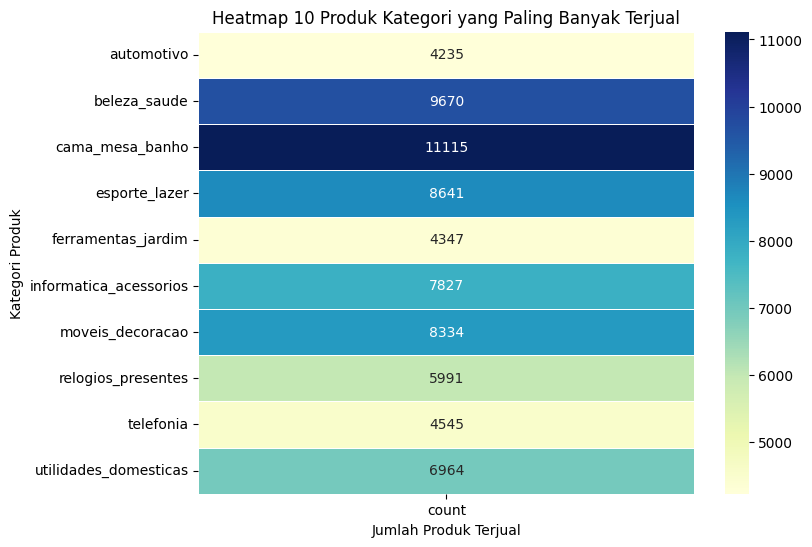

In [76]:
plt.figure(figsize=(8, 6))
sns.heatmap(kategori_pivot, annot=True, cmap="YlGnBu", fmt=".0f", linewidths=0.5)
plt.title("Heatmap 10 Produk Kategori yang Paling Banyak Terjual")
plt.xlabel("Jumlah Produk Terjual")
plt.ylabel("Kategori Produk")
plt.show()

**Insight:**
- Produk rumah tangga, kecantikan, dan olahraga adalah kategori yang paling laku, menunjukkan preferensi pelanggan terhadap barang kebutuhan sehari-hari dan gaya hidup sehat.
- Kategori otomotif dan perkakas taman masih bisa berkembang, mungkin dengan strategi pemasaran yang lebih baik atau produk yang lebih inovatif.

In [88]:
def print_conclusion():
    print("1. Metode pembayaran yang paling sering digunakan oleh High-Value Customers adalah '{}' dengan proporsi sebesar {:.1f}%.".format(
        high_value_payments['payment_type'].value_counts(normalize=True).idxmax(),
        high_value_payments['payment_type'].value_counts(normalize=True).max() * 100
    ))

    print("2. Produk kategori yang paling banyak terjual adalah '{}' dengan total penjualan sebanyak {} unit.".format(
        kategori_terjual['product_category_name'].iloc[0],
        kategori_terjual['count'].iloc[0]
    ))

print_conclusion()

1. Metode pembayaran yang paling sering digunakan oleh High-Value Customers adalah 'credit_card' dengan proporsi sebesar 68.7%.
2. Produk kategori yang paling banyak terjual adalah 'cama_mesa_banho' dengan total penjualan sebanyak 11115 unit.


## Conclusion

- Hal ini mengindikasikan bahwa mayoritas pelanggan lebih memilih metode pembayaran yang praktis dan cepat.
- Popularitas kategori ini dapat disebabkan oleh permintaan yang stabil dan tren konsumsi pelanggan dalam industri e-commerce.